In [ ]:
import os
os.chdir('/Users/chiamakaazodo/Documents/NLP/Homework/project')

In [35]:
#Import Python Libraries
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib as mpl
from matplotlib import pyplot as plt

In [30]:
#load in the the_data data frame
culture = pd.read_csv('culture.csv')
culture.head(5)

,comment,posts,utc,date,topic
0,"How is this even a question, I think you're ov...","As a southeast Asian (Filipino), would it be c...",1.608736e+09,2020-12-23 15:11:09,culture
1,The concept of cultural appropriation is a rec...,"As a southeast Asian (Filipino), would it be c...",1.608734e+09,2020-12-23 14:26:14,culture
2,"If it's comfortable, nobody got hurt, and it m...","As a southeast Asian (Filipino), would it be c...",1.608738e+09,2020-12-23 15:45:33,culture
3,"Not really, the shirt is not a traditional dre...","As a southeast Asian (Filipino), would it be c...",1.608737e+09,2020-12-23 15:23:20,culture
4,As a chinese person wear whatever the fuck you...,"As a southeast Asian (Filipino), would it be c...",1.608749e+09,2020-12-23 18:42:45,culture


In [ ]:
### WRITE FUNCTION FOR SENTIMENT ANALYSIS

In [31]:
#This function takes in a string runs it through vader sentiment analysis and returns the compound score 
def vader_senti(str_in): 
    from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
    senti = SentimentIntensityAnalyzer()
    out_put = senti.polarity_scores(str_in)["compound"]
    #out_put["sentiment"] = out_put.compound.apply(categorize_senti)
    return out_put

In [33]:
culture["compound_score"] = culture.comment.apply(vader_senti)
culture.head(5)

,comment,posts,utc,date,topic,compound_score
0,"How is this even a question, I think you're ov...","As a southeast Asian (Filipino), would it be c...",1.608736e+09,2020-12-23 15:11:09,culture,0.0000
1,The concept of cultural appropriation is a rec...,"As a southeast Asian (Filipino), would it be c...",1.608734e+09,2020-12-23 14:26:14,culture,0.7885
2,"If it's comfortable, nobody got hurt, and it m...","As a southeast Asian (Filipino), would it be c...",1.608738e+09,2020-12-23 15:45:33,culture,0.5778
3,"Not really, the shirt is not a traditional dre...","As a southeast Asian (Filipino), would it be c...",1.608737e+09,2020-12-23 15:23:20,culture,0.6908
4,As a chinese person wear whatever the fuck you...,"As a southeast Asian (Filipino), would it be c...",1.608749e+09,2020-12-23 18:42:45,culture,-0.4939


In [ ]:
### WRITE CODE FOR GRAPHICALLY PLOTTING SENTIMENT CHANGE OVER TIME

In [40]:
# Ensure the date column is the datetime format
culture['date'] = pd.to_datetime(culture['date'])

# Create a new column that collect just the month and date to allow for temporal grouping
culture['date_month'] = pd.to_datetime(culture['date']).dt.strftime('%Y-%m')
culture.head(5)

,comment,posts,utc,date,topic,compound_score,yyyy-mm,date_month
0,"How is this even a question, I think you're ov...","As a southeast Asian (Filipino), would it be c...",1.608736e+09,2020-12-23 15:11:09,culture,0.0000,2020-12,2020-12
1,The concept of cultural appropriation is a rec...,"As a southeast Asian (Filipino), would it be c...",1.608734e+09,2020-12-23 14:26:14,culture,0.7885,2020-12,2020-12
2,"If it's comfortable, nobody got hurt, and it m...","As a southeast Asian (Filipino), would it be c...",1.608738e+09,2020-12-23 15:45:33,culture,0.5778,2020-12,2020-12
3,"Not really, the shirt is not a traditional dre...","As a southeast Asian (Filipino), would it be c...",1.608737e+09,2020-12-23 15:23:20,culture,0.6908,2020-12,2020-12
4,As a chinese person wear whatever the fuck you...,"As a southeast Asian (Filipino), would it be c...",1.608749e+09,2020-12-23 18:42:45,culture,-0.4939,2020-12,2020-12


In [62]:
# Create a subset of the data that obtains the average sentiment score based on a month_year time period
## side note this could be heavily impacted by sample of the time period so it may not be the most ideal way

culture_plot = pd.DataFrame(culture.groupby('date_month').mean().reset_index())
culture_plot.head(5)

,date_month,utc,compound_score
0,2008-11,1.226577e+09,0.341600
1,2009-01,1.232003e+09,0.010050
2,2009-05,1.241260e+09,0.000000
3,2009-07,1.247410e+09,0.425691
4,2009-08,1.250055e+09,-0.226150


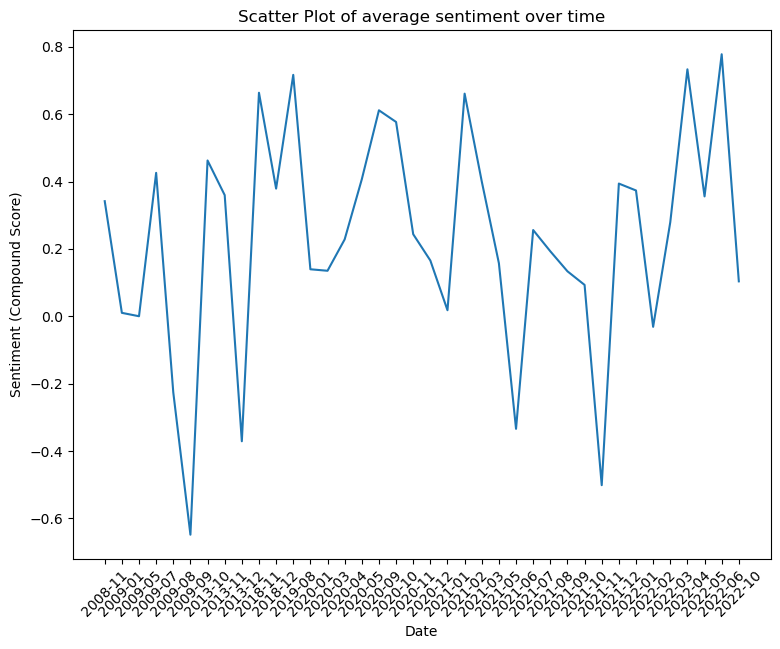

In [65]:

date = culture_plot['date_month']
sentiment = culture_plot['compound_score']
plt.plot(date, sentiment)
plt.title('Scatter Plot of average sentiment over time')
plt.xlabel("Date")  # add X-axis label
plt.ylabel("Sentiment (Compound Score)")  # add Y-axis label
plt.xticks(rotation = 45) #change the orientation of x-axis for easy visibility
plt.show()